In [1]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cycler
import pandas as pd
import numpy as np
import os
import sys

In [2]:
df1 = pd.read_csv('restotal3.txt', sep=',')

In [3]:
#Convert columns to numeric
num_cols = ['cpus_load','cpus_service', 'concurrency', 'lat_avg', 'lat_stdev', 'lat_max','req_avg', 'req_stdev', 'req_max', 'tot_requests', 'tot_duration','read', 'err_connect', 'err_read', 'err_write', 'err_timeout','req_sec_tot', 'read_tot', 'user_cpu', 'kern_cpu', 'mem_kb_uss','mem_kb_pss', 'mem_kb_rss', 'duration']
for col in num_cols: 
    df1[col]=pd.to_numeric(df1[col])

df1['total_cpu']=df1['user_cpu']+df1['kern_cpu']
df1['cpu_per_request']=df1['total_cpu']/df1['tot_requests']
df1['memory_per_request']=df1['mem_kb_uss']/df1['tot_requests']
    
#Add avg and sem
grouped_df=df1.groupby(['description','asyncservice','asyncdriver','cpus_load','cpus_service','concurrency']).agg(['mean','min','max','sem']).reset_index()
grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
grouped_df = grouped_df.reset_index()
grouped_df

,index,description_,asyncservice_,asyncdriver_,cpus_load_,cpus_service_,concurrency_,lat_avg_mean,lat_avg_min,lat_avg_max,...,total_cpu_max,total_cpu_sem,cpu_per_request_mean,cpu_per_request_min,cpu_per_request_max,cpu_per_request_sem,memory_per_request_mean,memory_per_request_min,memory_per_request_max,memory_per_request_sem
0,0,Web MVC JDBC,no,no,4,4,4,0.342608,0.32002,0.37889,...,15428,22.122137,0.019220,0.018369,0.019934,0.000099,2.036488,1.939536,2.136424,0.011362
1,1,Web MVC JDBC,no,no,4,4,50,5.399000,5.03000,5.95000,...,23879,707.405707,0.031427,0.028421,0.040286,0.000564,2.400188,1.959327,6.838490,0.234641
2,2,Web MVC JDBC,no,no,4,4,100,14.580000,13.55000,15.61000,...,23884,5.113077,0.035541,0.032343,0.039135,0.000443,2.555955,2.325682,2.817856,0.031404
3,3,Web MVC JDBC,no,no,4,4,150,26.369000,21.67000,29.10000,...,23893,4.668075,0.040650,0.034022,0.046210,0.000784,2.955783,2.503849,3.382839,0.057488
4,4,Web MVC JDBC,no,no,4,4,200,39.737500,34.50000,44.53000,...,23886,4.978520,0.044648,0.038590,0.050333,0.000744,3.309965,2.910124,3.726593,0.057690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,WebFlux R2DBC,yes,yes,4,4,600,39.942500,36.53000,44.65000,...,23491,9.054477,0.022959,0.022286,0.024187,0.000125,1.678229,1.625201,1.777511,0.009403
60,60,WebFlux R2DBC,yes,yes,4,4,700,46.024000,42.71000,51.09000,...,23453,5.256212,0.023064,0.022611,0.024258,0.000091,1.693309,1.652279,1.798761,0.007752
61,61,WebFlux R2DBC,yes,yes,4,4,800,51.562500,47.61000,60.01000,...,23479,7.412108,0.023149,0.022002,0.024337,0.000128,1.702527,1.622010,1.795772,0.010091
62,62,WebFlux R2DBC,yes,yes,4,4,900,56.611500,53.19000,59.73000,...,23462,6.386447,0.022948,0.022181,0.024050,0.000106,1.685951,1.625019,1.773624,0.008543


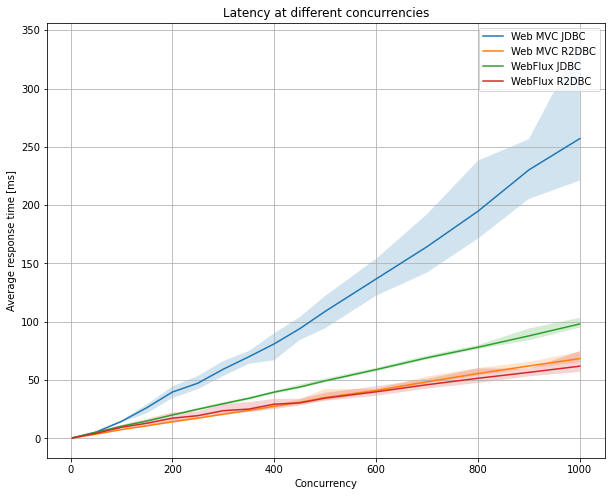

In [4]:
plt.close('all')
figure(num=None, figsize=(10, 8))

def custom_plot(x, y, ymin, ymax, **kwargs):
    ax = kwargs.pop('ax', plt.gca())
    base_line, = ax.plot(x, y, **kwargs)
    ax.fill_between(x, ymin, ymax, facecolor=base_line.get_color(), alpha=0.2)

for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['lat_avg_mean'], 'ymin': plot_data['lat_avg_min'],'ymax': plot_data['lat_avg_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Latency at different concurrencies')
plt.ylabel('Average response time [ms]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

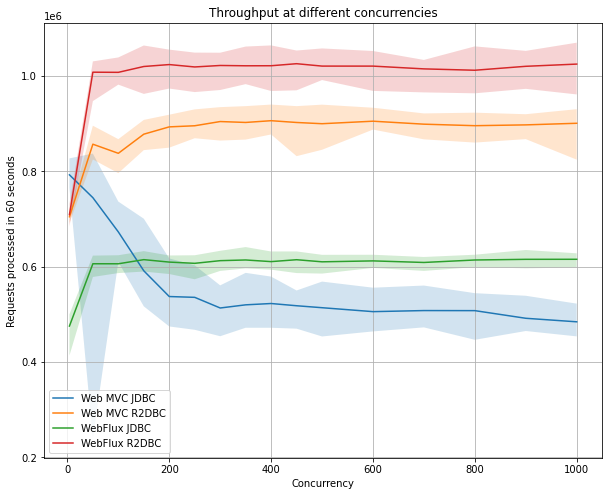

In [5]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['tot_requests_mean'], 'ymin': plot_data['tot_requests_min'],'ymax': plot_data['tot_requests_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Throughput at different concurrencies')
plt.ylabel('Requests processed in 60 seconds')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

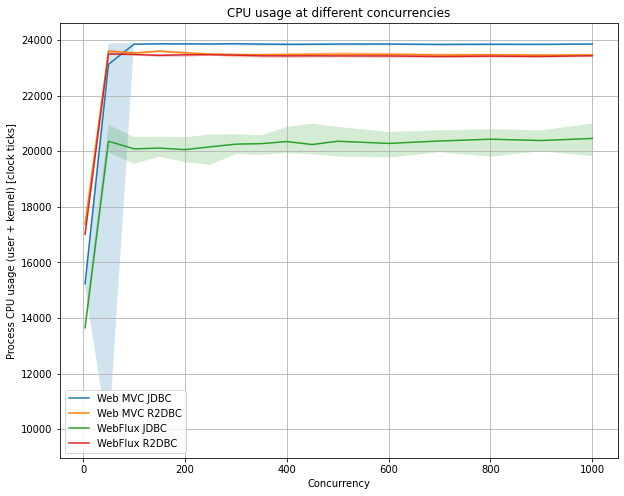

In [6]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['total_cpu_mean'], 'ymin': plot_data['total_cpu_min'],'ymax': plot_data['total_cpu_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('CPU usage at different concurrencies')
plt.ylabel('Process CPU usage (user + kernel) [clock ticks]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

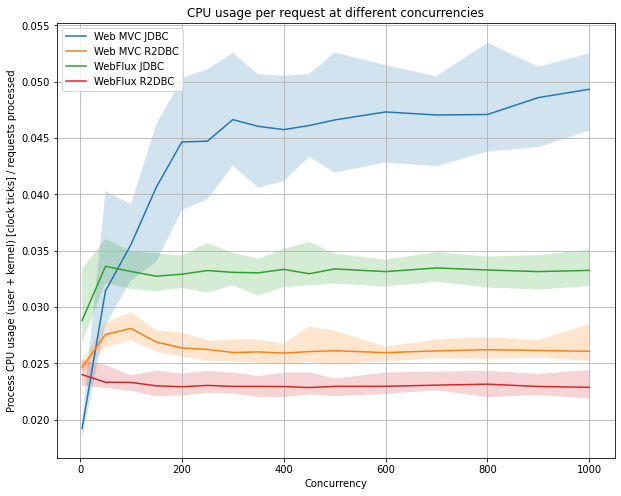

In [7]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['cpu_per_request_mean'], 'ymin': plot_data['cpu_per_request_min'],'ymax': plot_data['cpu_per_request_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('CPU usage per request at different concurrencies')
plt.ylabel('Process CPU usage (user + kernel) [clock ticks] / requests processed')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

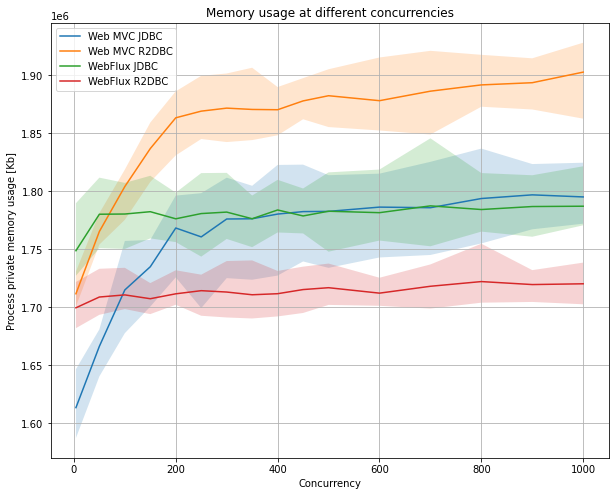

In [8]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['mem_kb_uss_mean'], 'ymin': plot_data['mem_kb_uss_min'],'ymax': plot_data['mem_kb_uss_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Memory usage at different concurrencies')
plt.ylabel('Process private memory usage [Kb]')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()

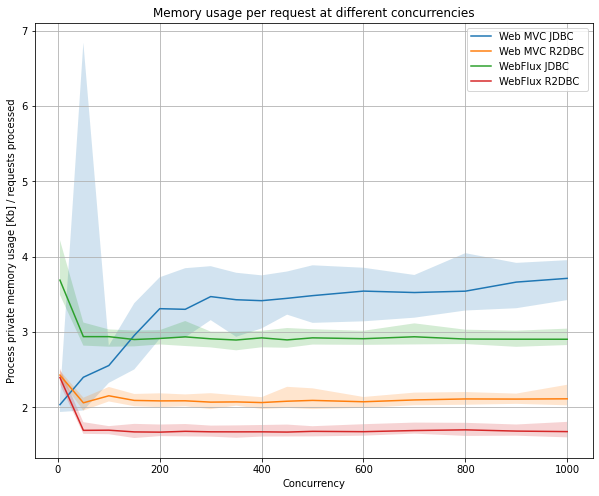

In [9]:
plt.close('all')
figure(num=None, figsize=(10, 8))
for group_name in grouped_df['description_'].unique():
        plot_data=grouped_df.loc[grouped_df['description_'] == group_name]
        df_plot=pd.DataFrame({'x': plot_data['concurrency_'], 'y': plot_data['memory_per_request_mean'], 'ymin': plot_data['memory_per_request_min'],'ymax': plot_data['memory_per_request_max']})
        custom_plot(df_plot['x'],df_plot['y'],df_plot['ymin'],df_plot['ymax'],label=group_name)

plt.title('Memory usage per request at different concurrencies')
plt.ylabel('Process private memory usage [Kb] / requests processed')
plt.xlabel('Concurrency')
plt.grid(True)
plt.legend()